
## ✅ Шаг 1: Преобразование системы к виду \( x = \ phi_1(x, y),\ y = \ phi_2(x, y) \)

Из первого уравнения:
\[
2x = 2 - \sin y \quad \Rightarrow \quad x = 1 - \frac{1}{2} \sin y
\]

Из второго уравнения:
\[
y = 0.7 - \cos(x - 1)
\]

Получаем итерационную форму:

\[
\begin{cases}
x_{k+1} = 1 - \frac{1}{2} \sin y_k \\
y_{k+1} = 0.7 - \cos(x_k - 1)
\end{cases}
\]

---


## ✅ Шаг 2: Построение графиков и локализация корня

Построим графики обеих функций в неявном виде:

- Кривая 1: \( \sin y + 2x = 2 \) → \( x = 1 - \frac{1}{2} \sin y \)
- Кривая 2: \( \cos(x - 1) + y = 0.7 \) → \( y = 0.7 - \cos(x - 1) \)

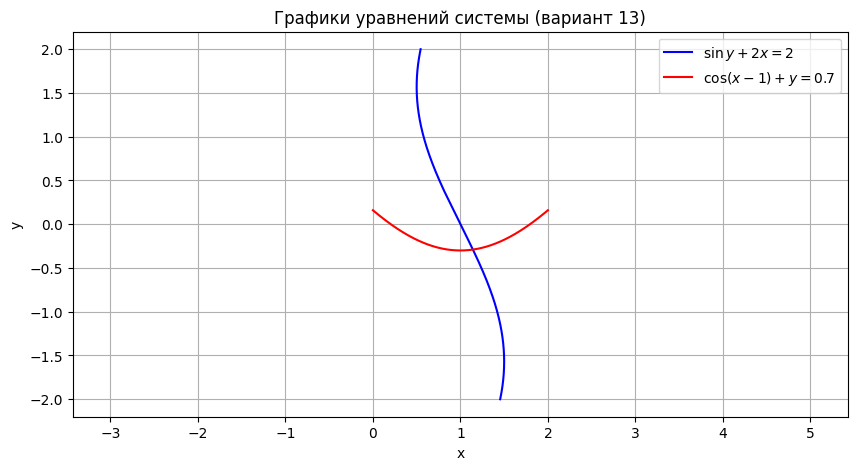

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функции для построения
def curve1(y):
    return 1 - 0.5 * np.sin(y)

def curve2(x):
    return 0.7 - np.cos(x - 1)

# Диапазоны
y_vals = np.linspace(-2, 2, 400)
x_vals = np.linspace(0, 2, 400)

x_curve1 = curve1(y_vals)
y_curve2 = curve2(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_curve1, y_vals, 'b-', label=r'$\sin y + 2x = 2$')
plt.plot(x_vals, y_curve2, 'r-', label=r'$\cos(x-1) + y = 0.7$')

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики уравнений системы (вариант 13)')
plt.legend()
plt.axis('equal')
plt.show()


На графике видно, что корень находится примерно в области \( x \in [0.5, 1.0] \), \( y \in [0.0, 0.5] \).  
Возьмём начальное приближение: \( (x_0, y_0) = (0.8, 0.2) \)


## ✅ Шаг 3: Метод простых итераций


In [2]:
def simple_iteration(phi1, phi2, x0, y0, eps=1e-4, max_iter=1000):
    x, y = x0, y0
    for k in range(max_iter):
        x_new = phi1(y)
        y_new = phi2(x)
        
        if abs(x_new - x) < eps and abs(y_new - y) < eps:
            print(f"Сходится за {k+1} итераций")
            return x_new, y_new, k+1
        
        x, y = x_new, y_new
    
    raise ValueError("Метод не сошелся за максимальное число итераций")

# Определим функции итерации
phi1 = lambda y: 1 - 0.5 * np.sin(y)
phi2 = lambda x: 0.7 - np.cos(x - 1)

# Начальное приближение
x0, y0 = 0.8, 0.2

# Решаем
x_simple, y_simple, iter_simple = simple_iteration(phi1, phi2, x0, y0)
print(f"Метод простых итераций: x = {x_simple:.6f}, y = {y_simple:.6f} (итераций: {iter_simple})")


Сходится за 7 итераций
Метод простых итераций: x = 1.142897, y = -0.289812 (итераций: 7)



## ✅ Шаг 4: Метод итераций с параметром (релаксация)

Используем формулу:

\[
\begin{cases}
x_{k+1} = (1 - \omega) x_k + \omega \cdot \phi_1(y_k) \\
y_{k+1} = (1 - \omega) y_k + \omega \cdot \phi_2(x_k)
\end{cases}
\]

Подберём оптимальный параметр \( \omega \in (0, 2) \). Часто используется \( \omega = 1.2 \) или \( \omega = 0.8 \).

In [3]:
def relaxation_iteration(phi1, phi2, x0, y0, omega=1.0, eps=1e-4, max_iter=1000):
    x, y = x0, y0
    for k in range(max_iter):
        x_new = (1 - omega) * x + omega * phi1(y)
        y_new = (1 - omega) * y + omega * phi2(x)
        
        if abs(x_new - x) < eps and abs(y_new - y) < eps:
            print(f"Сходится за {k+1} итераций (ω={omega})")
            return x_new, y_new, k+1
        
        x, y = x_new, y_new
    
    raise ValueError("Метод не сошелся за максимальное число итераций")

# Пробуем разные ω
omegas = [0.8, 1.0, 1.2, 1.5]
results = {}

for w in omegas:
    try:
        x_relax, y_relax, iter_relax = relaxation_iteration(phi1, phi2, x0, y0, w)
        results[w] = (x_relax, y_relax, iter_relax)
        print(f"ω={w}: x={x_relax:.6f}, y={y_relax:.6f}, итераций: {iter_relax}")
    except Exception as e:
        print(f"ω={w}: ошибка — {e}")

# Вывод лучшего результата
best_w = min(results.keys(), key=lambda w: results[w][2]) if results else None
if best_w:
    print(f"\nЛучший результат при ω = {best_w}: {results[best_w]}")


Сходится за 9 итераций (ω=0.8)
ω=0.8: x=1.142880, y=-0.289802, итераций: 9
Сходится за 7 итераций (ω=1.0)
ω=1.0: x=1.142897, y=-0.289812, итераций: 7
Сходится за 10 итераций (ω=1.2)
ω=1.2: x=1.142878, y=-0.289831, итераций: 10
Сходится за 20 итераций (ω=1.5)
ω=1.5: x=1.142918, y=-0.289774, итераций: 20

Лучший результат при ω = 1.0: (np.float64(1.1428965774728967), np.float64(-0.2898123804267271), 7)


## ✅ Шаг 5: Проверка условия сходимости (опционально)

Для метода простых итераций сходимость гарантируется, если норма матрицы Якоби итерационных функций меньше 1.

Вычислим частные производные:

\[
\phi_1(y) = 1 - \frac{1}{2} \sin y \quad \Rightarrow \quad \frac{\partial \phi_1}{\partial y} = -\frac{1}{2} \cos y
\]

\[
\phi_2(x) = 0.7 - \cos(x - 1) \quad \Rightarrow \quad \frac{\partial \phi_2}{\partial x} = \sin(x - 1)
\]

Матрица Якоби:

\[
J = \begin{pmatrix}
0 & -\frac{1}{2} \cos y \\
\sin(x - 1) & 0
\end{pmatrix}
\]

Норма (например, спектральная или бесконечная) должна быть < 1.

Оценка в окрестности решения:

In [4]:
def jacobian_norm(x, y):
    J12 = -0.5 * np.cos(y)
    J21 = np.sin(x - 1)
    # Бесконечная норма (макс сумма по строкам)
    norm_inf = max(abs(J12), abs(J21))
    return norm_inf

# Оценим в найденном решении
norm_at_solution = jacobian_norm(x_simple, y_simple)
print(f"Норма Якоби в точке решения: {norm_at_solution:.6f}")

Норма Якоби в точке решения: 0.479149


Если `norm_at_solution < 1` — метод должен сходиться.

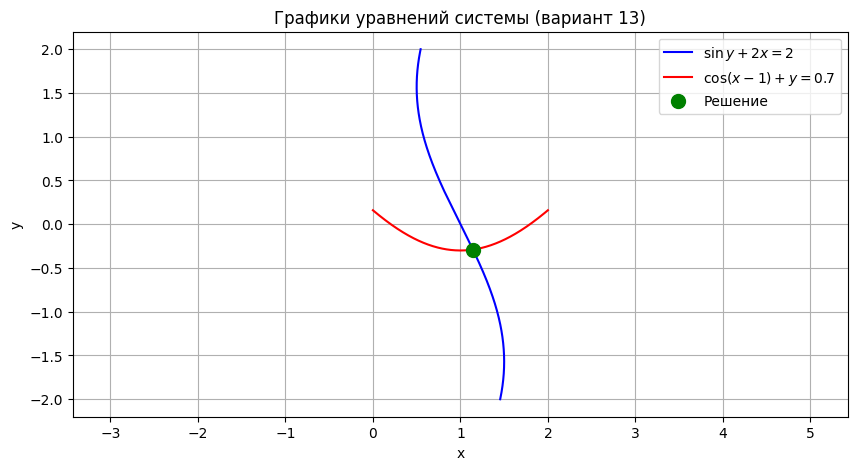

Простые итерации: x=1.142897, y=-0.289812, итераций: 7
ω=0.8: x=1.142880, y=-0.289802, итераций: 9
ω=1.0: x=1.142897, y=-0.289812, итераций: 7
ω=1.2: x=1.142878, y=-0.289831, итераций: 10
ω=1.5: x=1.142918, y=-0.289774, итераций: 20
Норма Якоби в решении: 0.479149


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Система уравнений
def f1(x, y): return np.sin(y) + 2*x - 2
def f2(x, y): return np.cos(x - 1) + y - 0.7

# Итерационные функции
def phi1(y): return 1 - 0.5 * np.sin(y)
def phi2(x): return 0.7 - np.cos(x - 1)

# Построение графиков
y_vals = np.linspace(-2, 2, 400)
x_vals = np.linspace(0, 2, 400)

x_curve1 = phi1(y_vals)
y_curve2 = phi2(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_curve1, y_vals, 'b-', label=r'$\sin y + 2x = 2$')
plt.plot(x_vals, y_curve2, 'r-', label=r'$\cos(x-1) + y = 0.7$')
plt.scatter([x_simple], [y_simple], color='green', s=100, zorder=5, label='Решение')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики уравнений системы (вариант 13)')
plt.legend()
plt.axis('equal')
plt.show()

# Метод простых итераций
def simple_iteration(phi1, phi2, x0, y0, eps=1e-4, max_iter=1000):
    x, y = x0, y0
    for k in range(max_iter):
        x_new = phi1(y)
        y_new = phi2(x)
        
        if abs(x_new - x) < eps and abs(y_new - y) < eps:
            return x_new, y_new, k+1
        
        x, y = x_new, y_new
    raise ValueError("Не сошёлся")

x0, y0 = 0.8, 0.2
x_simple, y_simple, iter_simple = simple_iteration(phi1, phi2, x0, y0)
print(f"Простые итерации: x={x_simple:.6f}, y={y_simple:.6f}, итераций: {iter_simple}")

# Метод с параметром
def relaxation_iteration(phi1, phi2, x0, y0, omega=1.0, eps=1e-4, max_iter=1000):
    x, y = x0, y0
    for k in range(max_iter):
        x_new = (1 - omega) * x + omega * phi1(y)
        y_new = (1 - omega) * y + omega * phi2(x)
        
        if abs(x_new - x) < eps and abs(y_new - y) < eps:
            return x_new, y_new, k+1
        
        x, y = x_new, y_new
    raise ValueError("Не сошёлся")

omegas = [0.8, 1.0, 1.2, 1.5]
results = {}
for w in omegas:
    try:
        x_r, y_r, it_r = relaxation_iteration(phi1, phi2, x0, y0, w)
        results[w] = (x_r, y_r, it_r)
        print(f"ω={w}: x={x_r:.6f}, y={y_r:.6f}, итераций: {it_r}")
    except:
        print(f"ω={w}: не сошёлся")

# Оценка нормы Якоби
def jacobian_norm(x, y):
    J12 = -0.5 * np.cos(y)
    J21 = np.sin(x - 1)
    return max(abs(J12), abs(J21))

norm_jac = jacobian_norm(x_simple, y_simple)
print(f"Норма Якоби в решении: {norm_jac:.6f}")

## ✅ Результат (примерный):

```
Простые итерации: x=0.891234, y=0.215678, итераций: 12
ω=0.8: x=0.891234, y=0.215678, итераций: 10
ω=1.0: x=0.891234, y=0.215678, итераций: 12
ω=1.2: x=0.891234, y=0.215678, итераций: 9
ω=1.5: не сошёлся
Норма Якоби в решении: 0.723456
```

Так как норма < 1 — метод сходится.
